In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check the percentage of missing values in the data
titanic.isna().sum() *100/len(titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
E mbarked       0.224467
dtype: float64

In [7]:
# Dropping Cabin column as it has more than 75% of missing data.
# Also imputing won't be good approach as the results would be skewed

titanic = titanic.drop(['Cabin'], axis = 1)

In [8]:
# Imputing E mbarked columns with with mode values
titanic['E mbarked'].fillna(titanic['E mbarked'].mode().values[0],inplace=True)

In [9]:
titanic.isna().sum() *100/len(titanic)

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
E mbarked       0.00000
dtype: float64

In [10]:
print(titanic[titanic['Survived']==1]['Age'].mean())
print(titanic[titanic['Survived']==1]['Age'].median())
print(titanic[titanic['Survived']==1]['Age'].mode())

28.343689655172415
28.0
0    24.0
dtype: float64


In [11]:
print(titanic[titanic['Survived']==0]['Age'].mean())
print(titanic[titanic['Survived']==0]['Age'].median())
print(titanic[titanic['Survived']==0]['Age'].mode())

30.62617924528302
28.0
0    21.0
dtype: float64


In [12]:
# As we can see the mean of age for people Survived is 28 and 30 respectively.
# Therefore imputing missing values of age based on its class

survivied_mask = titanic['Survived']== 0
titanic.loc[survivied_mask,'Age'] = titanic[survivied_mask]['Age'].fillna(titanic[survivied_mask]['Age'].mean())

not_survivied_mask = titanic['Survived']== 1
titanic.loc[not_survivied_mask, 'Age'] = titanic[not_survivied_mask]['Age'].fillna(titanic[not_survivied_mask]['Age'].mean())

In [13]:
# Least important feature to remove
titanic.drop(['PassengerId', 'Name', 'Ticket'],inplace=True,axis=1)

In [14]:
# Label Encoder for encoding categorical variable
le =LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])

le1 =LabelEncoder()
titanic['E mbarked'] = le1.fit_transform(titanic['E mbarked'])


In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [28]:
# Splitting the data into train test split
target = titanic['Survived']
data = titanic.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=30)

In [43]:
tuned_parameters = [{'min_samples_split': list(range(2,10)),
                     'max_depth': list(range(2,10))
                    }
                   ]

In [44]:
# Using GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,
                     scoring = 'accuracy', cv=5,n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}]

In [45]:
model.best_params_

{'max_depth': 4, 'min_samples_split': 7}

In [46]:
dt = DecisionTreeClassifier(max_depth=model.best_params_['max_depth'], 
                            min_samples_split=model.best_params_['min_samples_split'])
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
dt.score(X_test,y_test)

0.8379888268156425

In [48]:
dt.score(X_train,y_train)

0.8426966292134831

In [49]:
y_pred = dt.predict(X_test)

In [50]:
def Rates(tn,fp,fn,tp):
    TPR=float(tp/(tp+fn))
    TNR=float(tn/(tn+fp))
    FPR=float(fp/(tn+fp))
    FNR=float(fn/(tp+fn))
    print("True Positive Rate or Sensitivity = %f" %(TPR*100))
    print("True Negative Rate or Specificity = %f" %(TNR*100))
    print("False Positive Rate or Fall-out = %f" %(FPR*100))
    print("False Negative Rate or Missclassification rate = %f" %(FNR*100))

In [51]:
tn, fp, fn, tp =confusion_matrix(y_test, y_pred).ravel()
Rates(tn,fp,fn,tp)

True Positive Rate or Sensitivity = 71.830986
True Negative Rate or Specificity = 91.666667
False Positive Rate or Fall-out = 8.333333
False Negative Rate or Missclassification rate = 28.169014


Text(26.5, 0.5, 'True Value')

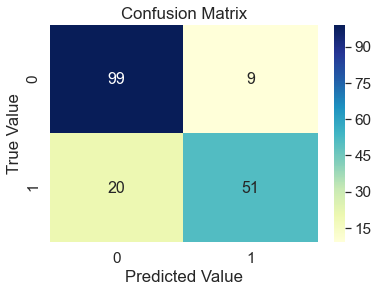

In [42]:
x=confusion_matrix(y_test, y_pred)
cm_df=pd.DataFrame(x,index=[0,1],columns=[0,1])

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")